In [1]:
# imports
import numpy as np
import pandas as pd

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report, confusion_matrix  



cv = CountVectorizer()
transformer = TfidfTransformer()
tfidfvect = TfidfVectorizer()



In [2]:
import seaborn as sns
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
sns.set_palette(sns.color_palette('Paired'))
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha='right')
    plt.ylabel('True Sentiment')
    plt.xlabel('Predicted Sentiment')

In [3]:
# df = pd.read_csv('data_stem_sw.csv')
df = pd.read_csv('dataset.csv',nrows=10000)
df = pd.DataFrame(df)
df.head()


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [4]:
X = df['text']
y = df['humor']
class_names = ['FUNNY','NOT FUNNY']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.head()

9254    Nbc obtains video claiming to show anti-isis r...
1561         *smashes bag of oreos *pours on top of salad
1670           The hiring guru: meir ezra and good people
6087    Russian opposition leader navalny attacked and...
6669               The top 10 workout songs for june 2015
Name: text, dtype: object

In [5]:
X_train_count = cv.fit_transform(X_train)
X_train_tfidf = transformer.fit_transform(X_train_count)

X_test_count = cv.transform(X_test)
X_test_tfidf = transformer.transform(X_test_count)

NB MODEL TRAINING AND TESTING

[[825 189]
 [ 35 951]]
              precision    recall  f1-score   support

       False       0.96      0.81      0.88      1014
        True       0.83      0.96      0.89       986

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000



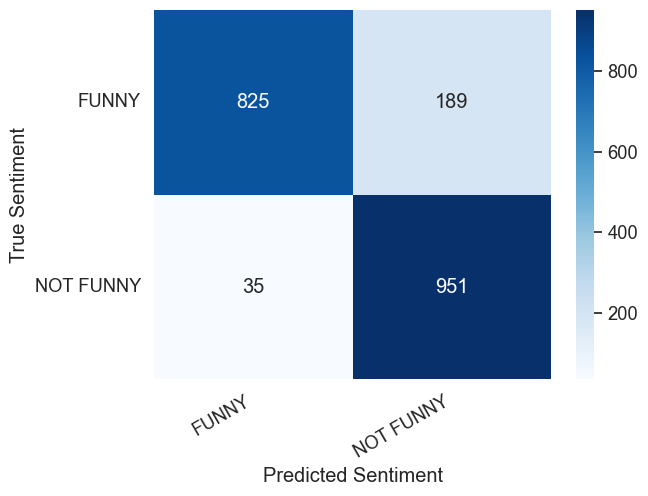

In [6]:
nb = MultinomialNB()
nb_model = nb.fit(X_train_tfidf,y_train)
nb_pred = nb_model.predict(X_test_tfidf)

print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
nb_model.score(X_test_tfidf,y_test)


cm = confusion_matrix(y_test, nb_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns = class_names)
show_confusion_matrix(df_cm)


In [ ]:
SVM MODEL TRAINING AND TESTING

In [7]:
svm = SVC()
svm_model = svm.fit(X_train_tfidf,y_train)
svm_model.predict(X_test_tfidf)
svm_model.score(X_test_tfidf,y_test)

0.899

In [10]:
# hyperparamter tuning
kernels = ['poly', 'rbf', 'sigmoid','linear']
def get_classifer(n):
    print(kernels[n])
    if n == 0:
        return SVC(kernel=kernels[0],degree=8,gamma='auto')
    else:
        return SVC(kernel=kernels[n],gamma='auto')
    
for i in range(4):
    svm_model = get_classifer(i)
    svm_model.fit(X_train_tfidf,y_train)
    y_pred = svm_model.predict(X_test_tfidf)
    print(classification_report(y_test,y_pred,zero_division=0))
    print(confusion_matrix(y_test,y_pred))


# in this classification report linear does best

poly
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1014
        True       0.49      1.00      0.66       986

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000

[[   0 1014]
 [   0  986]]
rbf
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1014
        True       0.49      1.00      0.66       986

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000

[[   0 1014]
 [   0  986]]
sigmoid
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1014
        True       0.49      1.00      0.66       986

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
wei

              precision    recall  f1-score   support

       False       0.91      0.89      0.90      1014
        True       0.89      0.91      0.90       986

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

[[902 112]
 [ 93 893]]


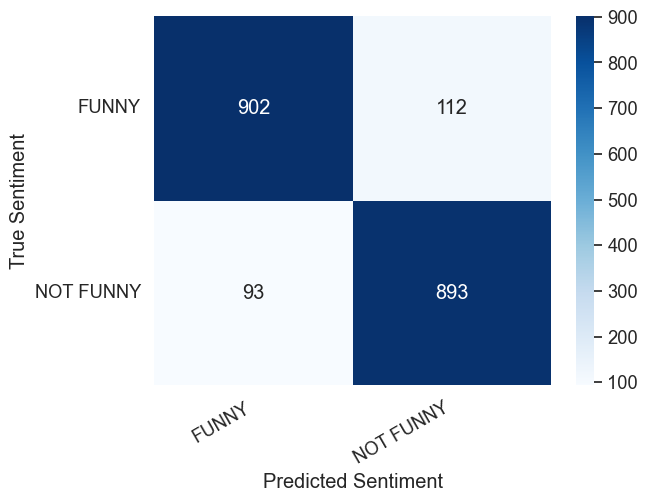

In [13]:
svm_model = SVC(kernel='linear',gamma='auto')
svm_model.fit(X_train_tfidf,y_train)
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred,zero_division=0))
print(confusion_matrix(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns = class_names)
show_confusion_matrix(df_cm)
